In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("biorreator.csv")
df

,temperature,duration,speed,baffles,yield
0,82,260,4300.0,No,51.0
1,90,260,3700.0,Yes,30.0
2,88,260,4200.0,Yes,40.0
3,86,260,3300.0,Yes,28.0
4,80,260,NaN,No,NaN
5,78,260,4300.0,Yes,49.0
6,82,260,3900.0,Yes,44.0
7,83,260,4300.0,No,59.0
8,64,260,4300.0,NaN,60.0
9,73,260,4400.0,No,59.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  14 non-null     int64  
 1   duration     14 non-null     int64  
 2   speed        13 non-null     float64
 3   baffles      13 non-null     object 
 4   yield        12 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 692.0+ bytes


<Axes: >

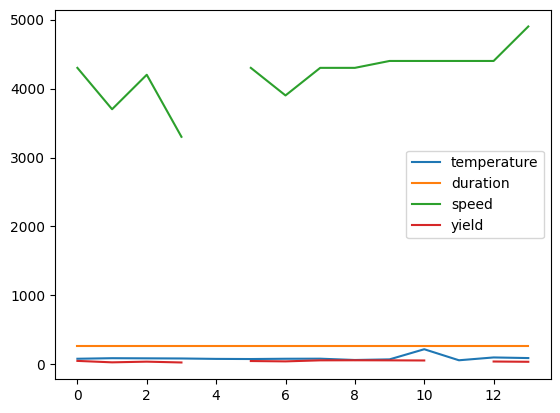

In [4]:
df.plot()

* Falta de dados (**speed**, **yield**)
* Escalas desporpocionais => Usar Standardization para colocar todos os dados à mesma escala
* Variável categórica não plotada (**baffles**) => Pois ela é categórica, é necessário converter para um valor numérico
* Variável constante (**duration**) => Não serve para nada porque não varia

In [5]:
# Substituir NaN pela moda
df["baffles"].fillna(df["baffles"].mode()[0], inplace=True)

In [6]:
# Converter para binário
df["baffles"].replace(["Yes", "No"], [1, 0], inplace=True)

In [7]:
# Standardizar cada coluna
for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df

,temperature,duration,speed,baffles,yield
0,-0.242816,NaN,0.216269,-0.834523,0.408181
1,-0.035218,NaN,-1.317275,1.112697,-1.462030
2,-0.087117,NaN,-0.039322,1.112697,-0.571453
3,-0.139017,NaN,-2.339638,1.112697,-1.640145
4,-0.294716,NaN,NaN,-0.834523,NaN
5,-0.346615,NaN,0.216269,1.112697,0.230066
6,-0.242816,NaN,-0.806094,1.112697,-0.215223
7,-0.216866,NaN,0.216269,-0.834523,1.120642
8,-0.709913,NaN,0.216269,-0.834523,1.209700
9,-0.476365,NaN,0.471860,-0.834523,1.120642


<Axes: >

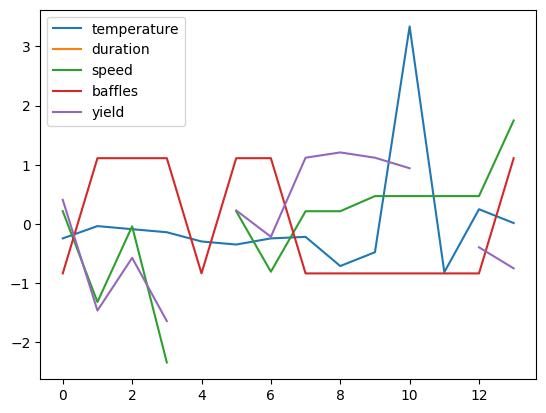

In [8]:
df.plot()

a) Remova atributos não informativos 

<Axes: >

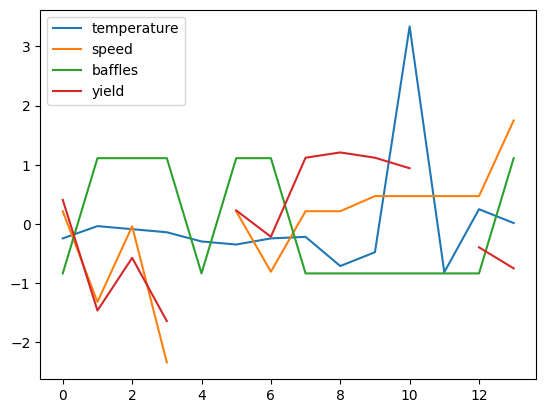

In [9]:
# Remover coluna constante
df.drop(columns=["duration"], inplace=True)
df.plot()

b) Remover os registos que contenham nulos

<Axes: >

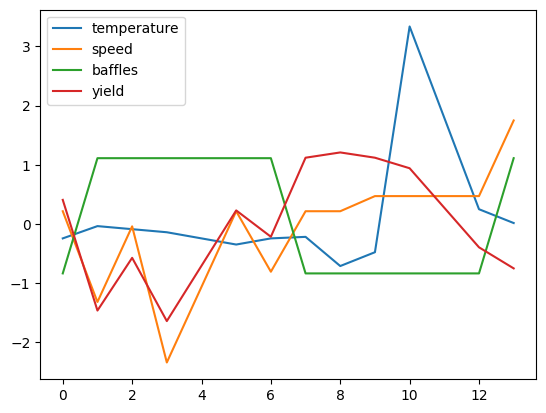

In [10]:
df_drop_rows = df.dropna(axis=0)
df_drop_rows.plot()

c) Remover os atributos que contenham nulos

<Axes: >

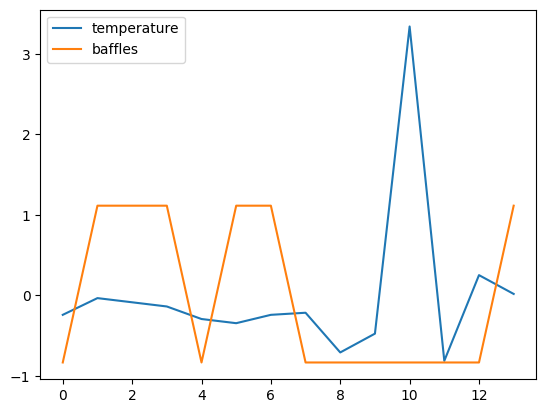

In [11]:
df_drop_cols = df.dropna(axis=1)
df_drop_cols.plot()

d) Preencher os valores nulos com os valores médios dos atributos 

<Axes: >

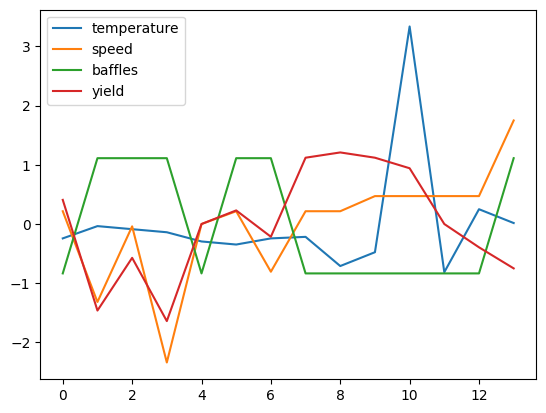

In [12]:
df_fillna_mean = df.copy()

for col in df_fillna_mean.columns:
    df_fillna_mean[col].fillna(df_fillna_mean[col].mean(), inplace=True)

df_fillna_mean.plot()

e) Aplicar interpolação linear com os valores dos registos mais próximos. NOTA: Se os valores dos 
registos mais próximos forem nulos, deve procurar os primeiros valores não nulos do atributo e 
fazer uma média.

In [13]:
df_fillna_linear_interpolation = df.copy()

df_fillna_linear_interpolation.interpolate(inplace=True)

# Substituir os NaNs restantes pela média dos primeiros valores do atributo/coluna
for col in df_fillna_linear_interpolation.columns:
    indexes = df[df_fillna_linear_interpolation[col].isna()].index

    for i in indexes:
        mean = df_fillna_linear_interpolation[col][:i].mean()
        df_fillna_linear_interpolation[col][i] = mean

<Axes: >

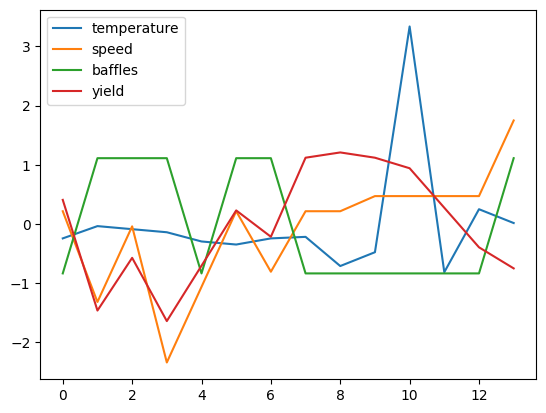

In [14]:
df_fillna_linear_interpolation.plot()

**Vou utilizar a susbtituição por média, como método final**

In [15]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

2. Através de análise gráfica, verifique se existe alguma correlação linear assinalável entre cada um 
dos atributos preditores e a saída (yield).

array([[<Axes: xlabel='temperature', ylabel='temperature'>,
        <Axes: xlabel='speed', ylabel='temperature'>,
        <Axes: xlabel='baffles', ylabel='temperature'>,
        <Axes: xlabel='yield', ylabel='temperature'>],
       [<Axes: xlabel='temperature', ylabel='speed'>,
        <Axes: xlabel='speed', ylabel='speed'>,
        <Axes: xlabel='baffles', ylabel='speed'>,
        <Axes: xlabel='yield', ylabel='speed'>],
       [<Axes: xlabel='temperature', ylabel='baffles'>,
        <Axes: xlabel='speed', ylabel='baffles'>,
        <Axes: xlabel='baffles', ylabel='baffles'>,
        <Axes: xlabel='yield', ylabel='baffles'>],
       [<Axes: xlabel='temperature', ylabel='yield'>,
        <Axes: xlabel='speed', ylabel='yield'>,
        <Axes: xlabel='baffles', ylabel='yield'>,
        <Axes: xlabel='yield', ylabel='yield'>]], dtype=object)

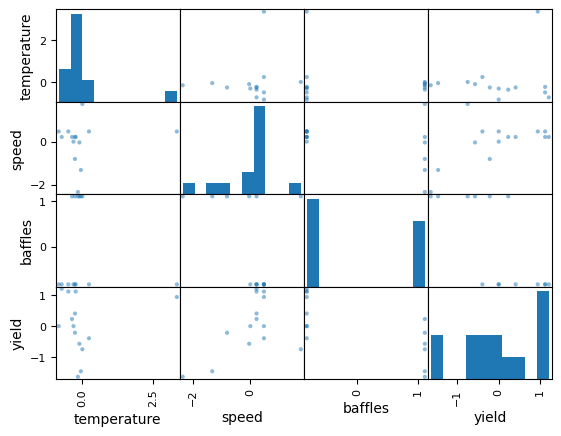

In [16]:
pd.plotting.scatter_matrix(df)

É possível verificar uma leve correlação positiva entre `speed` e `yield`.

Entre `temperature` e `yield` a correlação deverá aproximar-se de 0, ou seja, sem correlação.

Já entre `baffles` e `yield` o gráfico de dispersão não é indicado, por serem tipos de dados diferentes (categórico e numérico, respetivamente).

Como pode-se observar pela correlação de Pearson o que foi dito acima confirma-se.

In [21]:
df[["temperature", "speed", "yield"]].corr()

,temperature,speed,yield
temperature,1.000000,0.108616,0.134008
speed,0.108616,1.000000,0.528982
yield,0.134008,0.528982,1.000000


3. Verifique se existe dependência linear de linhas ou colunas, no dataset ‘biorreator.csv’. Que 
conclusão retira do resultado?

In [22]:
df.corr()

,temperature,speed,baffles,yield
temperature,1.000000,0.108616,-0.124937,0.134008
speed,0.108616,1.000000,-0.395407,0.528982
baffles,-0.124937,-0.395407,1.000000,-0.717833
yield,0.134008,0.528982,-0.717833,1.000000


Em relação a colunas a única depedência linear será entre `speed` e `yield`.